In [2]:
import pandas as pd
df=pd.read_csv("C:/Users/subik/Downloads/products_100_rows.csv")
df

,Product,Category,Price Before,Price After,Weight Before,Weight After,Date
0,Cheerioes,Cereals,349.73,321.7516,5.17,5.2217,1/8/2023
1,Mountain Dew,Beverages,103.17,99.0432,5.48,5.8636,12/9/2022
2,Whole Milk,Dairy,228.85,199.0995,3.36,3.6288,10/25/2022
3,Special K,Cereals,429.09,411.9264,4.84,5.1788,9/10/2022
4,Oreos,Snacks,444.48,382.2528,6.46,7.4290,8/26/2022
...,...,...,...,...,...,...,...
95,Pretzels,Snacks,347.50,327.1073,3.80,3.9640,08/27/2022
96,Cheddar Cheese,Dairy,153.06,134.4457,5.47,5.6493,04/20/2022
97,Cream,Dairy,319.41,280.3420,4.28,4.3231,08/01/2022
98,Chips,Snacks,91.22,85.4901,2.22,2.2471,01/28/2022


In [3]:
#Part 1 – Pandas Basics

In [4]:
df.head(5)

,Product,Category,Price Before,Price After,Weight Before,Weight After,Date
0,Cheerioes,Cereals,349.73,321.7516,5.17,5.2217,1/8/2023
1,Mountain Dew,Beverages,103.17,99.0432,5.48,5.8636,12/9/2022
2,Whole Milk,Dairy,228.85,199.0995,3.36,3.6288,10/25/2022
3,Special K,Cereals,429.09,411.9264,4.84,5.1788,9/10/2022
4,Oreos,Snacks,444.48,382.2528,6.46,7.4290,8/26/2022


In [5]:
df.shape

(100, 7)

In [6]:
df.columns

Index(['Product', 'Category', 'Price Before', 'Price After', 'Weight Before',
       'Weight After', 'Date'],
      dtype='object')

In [7]:
df.dtypes

Product           object
Category          object
Price Before     float64
Price After      float64
Weight Before    float64
Weight After     float64
Date              object
dtype: object

In [8]:
#check for missing values
df.isnull().sum()

Product          0
Category         0
Price Before     0
Price After      0
Weight Before    0
Weight After     0
Date             0
dtype: int64

In [9]:
dup=df.duplicated()
df[dup]

,Product,Category,Price Before,Price After,Weight Before,Weight After,Date


In [10]:
#Show summary statistics for numerical columns.
df.describe()

,Price Before,Price After,Weight Before,Weight After
count,100.000000,100.000000,100.000000,100.000000
mean,270.460800,243.526199,4.405000,4.570820
std,138.376012,124.029937,1.350802,1.414995
min,50.040000,42.891500,2.040000,2.070400
25%,149.642500,132.454050,3.347500,3.495725
50%,272.610000,248.351550,4.340000,4.499550
75%,396.617500,354.867800,5.482500,5.739025
max,499.080000,446.183000,6.980000,7.429000


In [11]:
#Part 2 – EDA

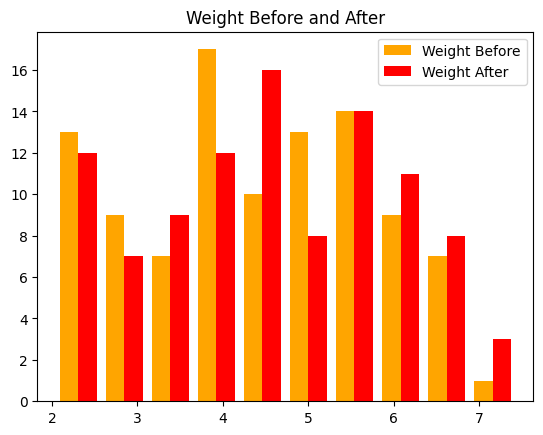

In [12]:
#Histogram of product sizes before and after.

import matplotlib.pyplot as plt
plt.hist([df['Weight Before'],df['Weight After']],bins=10,color=['orange','red'],label=['Weight Before','Weight After'])
plt.legend()
plt.title('Weight Before and After')
plt.savefig('plots/weight.png')
plt.show()

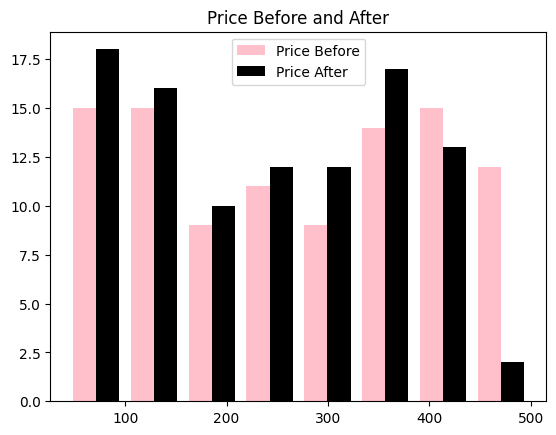

In [30]:
#Histogram of prices before and after.

import matplotlib.pyplot as plt
plt.hist([df['Price Before'],df['Price After']],bins=8,color=['pink','black'],label=['Price Before','Price After'])
plt.legend()
plt.title('Price Before and After')
plt.savefig('plots/price.png')
plt.show()

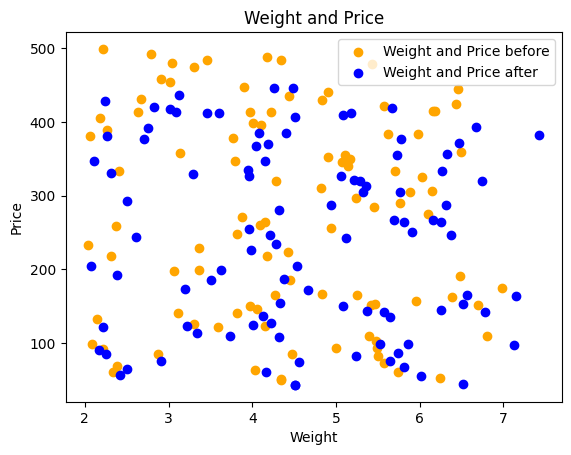

In [31]:
#Scatter plot comparing size vs price change.

import matplotlib.pyplot as plt
plt.scatter(df['Weight Before'],df['Price Before'],color='orange',label='Weight and Price before')
plt.scatter(df['Weight After'],df['Price After'],color='blue',label='Weight and Price after')
plt.legend()
plt.xlabel('Weight')
plt.ylabel('Price')
plt.title('Weight and Price')
plt.savefig('plots/weight_price.png')
plt.show()

In [15]:
#Identify top 3 products with biggest size drop.

df['weight_diff']=df['Weight After']-df['Weight Before']
max=df.groupby('Product')['weight_diff'].max()
max_prod=max.sort_values(ascending=False)
max_prod.head(3).index

Index(['Oreos', 'Cheese Its', 'Mountain Dew'], dtype='object', name='Product')

In [16]:
#Identify top 3 products with biggest price increase.

df['price_diff']=df['Price Before']-df['Price After']
max=df.groupby('Product')['price_diff'].max()
max_prod=max.sort_values(ascending=False)
max_prod.head(3).index

Index(['Iced Tea', 'Chips', 'Fanta'], dtype='object', name='Product')

In [17]:
#Statistics

In [18]:
#Calculate mean, median, and std deviation for size changes.

df['weight_diff']=df['Weight After']-df['Weight Before']
mean=df['weight_diff'].mean()
median=df['weight_diff'].median()
std=df['weight_diff'].std()
print('Mean: ',mean)
print('Median: ',median)
print('Standard deviation: ',std)

Mean:  0.16581999999999994
Median:  0.15225
Standard deviation:  0.12179666612345297


In [19]:
#Calculate correlation between size change % and price change %.

df['weight_change_percentage']=(abs(df['Weight After']-df['Weight Before'])/df['Weight Before'])*100
df['price_change_percentage']=(abs(df['Price After']-df['Price Before'])/df['Price Before'])*100
df['weight_change_percentage'].corr(df['price_change_percentage'])

np.float64(0.014969262611405318)

In [20]:
#Probability that a product experienced shrink-flation.

Shrinkflation_Flag=(df['Weight Before']>df['Weight After']) & ((df['Price Before']==df['Price After']) | (df['Price Before']<df['Price After']))
numerator=Shrinkflation_Flag.sum()
denominator=df.shape[0]
print('Probability: ',int(numerator/denominator))

Probability:  0


In [21]:
#Part 4 – Feature Engineering

In [22]:
#Create Size_Change_Percentage = ((new_size - original_size) / original_size) × 100.
#Create Price_Change_Percentage = ((new_price - original_price) / original_price) × 100.

df['weight_change_percentage']=(abs(df['Weight After']-df['Weight Before'])/df['Weight Before'])*100
df['price_change_percentage']=(abs(df['Price After']-df['Price Before'])/df['Price Before'])*100
df

,Product,Category,Price Before,Price After,Weight Before,Weight After,Date,weight_diff,price_diff,weight_change_percentage,price_change_percentage
0,Cheerioes,Cereals,349.73,321.7516,5.17,5.2217,1/8/2023,0.0517,27.9784,1.000000,8.000000
1,Mountain Dew,Beverages,103.17,99.0432,5.48,5.8636,12/9/2022,0.3836,4.1268,7.000000,4.000000
2,Whole Milk,Dairy,228.85,199.0995,3.36,3.6288,10/25/2022,0.2688,29.7505,8.000000,13.000000
3,Special K,Cereals,429.09,411.9264,4.84,5.1788,9/10/2022,0.3388,17.1636,7.000000,4.000000
4,Oreos,Snacks,444.48,382.2528,6.46,7.4290,8/26/2022,0.9690,62.2272,15.000000,14.000000
...,...,...,...,...,...,...,...,...,...,...,...
95,Pretzels,Snacks,347.50,327.1073,3.80,3.9640,08/27/2022,0.1640,20.3927,4.315789,5.868403
96,Cheddar Cheese,Dairy,153.06,134.4457,5.47,5.6493,04/20/2022,0.1793,18.6143,3.277879,12.161440
97,Cream,Dairy,319.41,280.3420,4.28,4.3231,08/01/2022,0.0431,39.0680,1.007009,12.231301
98,Chips,Snacks,91.22,85.4901,2.22,2.2471,01/28/2022,0.0271,5.7299,1.220721,6.281408


In [23]:
#Create Shrinkflation_Flag = True if size increased AND price stayed same/decreased.

df['Shrinkflation_Flag']=Shrinkflation_Flag.astype(int)
df

,Product,Category,Price Before,Price After,Weight Before,Weight After,Date,weight_diff,price_diff,weight_change_percentage,price_change_percentage,Shrinkflation_Flag
0,Cheerioes,Cereals,349.73,321.7516,5.17,5.2217,1/8/2023,0.0517,27.9784,1.000000,8.000000,0
1,Mountain Dew,Beverages,103.17,99.0432,5.48,5.8636,12/9/2022,0.3836,4.1268,7.000000,4.000000,0
2,Whole Milk,Dairy,228.85,199.0995,3.36,3.6288,10/25/2022,0.2688,29.7505,8.000000,13.000000,0
3,Special K,Cereals,429.09,411.9264,4.84,5.1788,9/10/2022,0.3388,17.1636,7.000000,4.000000,0
4,Oreos,Snacks,444.48,382.2528,6.46,7.4290,8/26/2022,0.9690,62.2272,15.000000,14.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...
95,Pretzels,Snacks,347.50,327.1073,3.80,3.9640,08/27/2022,0.1640,20.3927,4.315789,5.868403,0
96,Cheddar Cheese,Dairy,153.06,134.4457,5.47,5.6493,04/20/2022,0.1793,18.6143,3.277879,12.161440,0
97,Cream,Dairy,319.41,280.3420,4.28,4.3231,08/01/2022,0.0431,39.0680,1.007009,12.231301,0
98,Chips,Snacks,91.22,85.4901,2.22,2.2471,01/28/2022,0.0271,5.7299,1.220721,6.281408,0


In [24]:
print(df['weight_change_percentage'].astype(int))
print(df['price_change_percentage'].astype(int))

0      1
1      6
2      8
3      7
4     15
      ..
95     4
96     3
97     1
98     1
99     3
Name: weight_change_percentage, Length: 100, dtype: int64
0      8
1      4
2     12
3      3
4     14
      ..
95     5
96    12
97    12
98     6
99     5
Name: price_change_percentage, Length: 100, dtype: int64


In [25]:
#Part 5 – SQL Simulation in Pandas

In [26]:
df.sort_values('Product')[['Product','weight_change_percentage','price_change_percentage','Shrinkflation_Flag']].reset_index(drop=True)

,Product,weight_change_percentage,price_change_percentage,Shrinkflation_Flag
0,Butter,1.190972,10.523331,0
1,Butter,3.694158,9.000240,0
2,Butter,4.663350,11.596363,0
3,Butter,4.607251,13.245848,0
4,Butter,2.238411,8.969504,0
...,...,...,...,...
95,Whole Milk,8.000000,13.000000,0
96,Yogurt,4.695811,7.144141,0
97,Yogurt,1.415730,12.452749,0
98,Yogurt,3.445887,11.887991,0


In [27]:
#ADDITIONAL

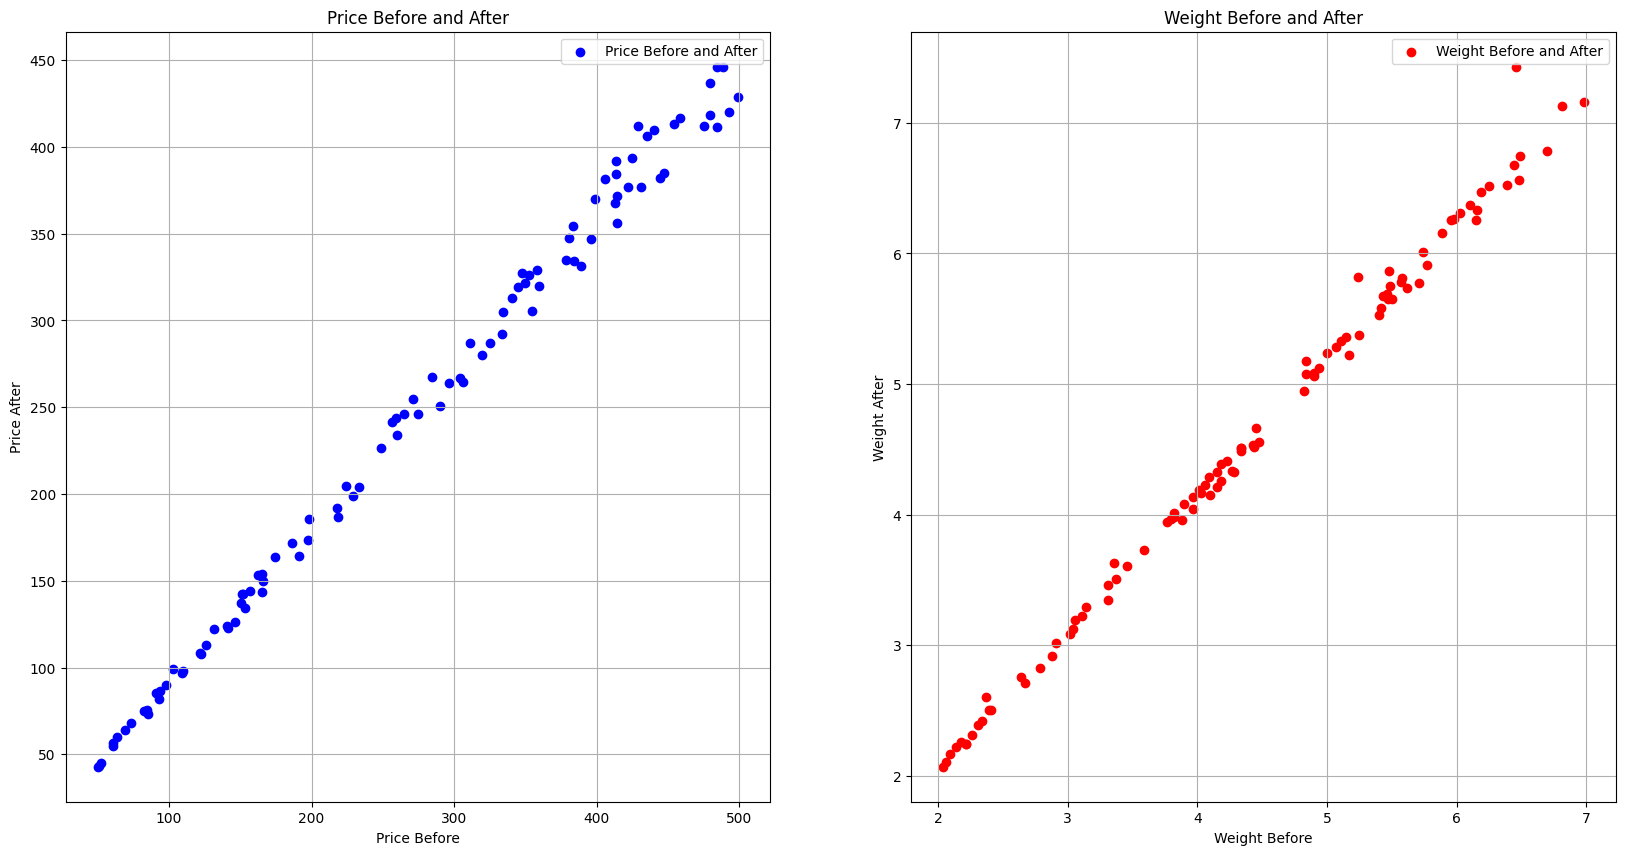

In [32]:
import matplotlib.pyplot as plt
fig,axs=plt.subplots(1,2,figsize=(20,10))

axs[0].scatter(df['Price Before'],df['Price After'],color='blue',label='Price Before and After')
axs[0].set_xlabel('Price Before')
axs[0].set_ylabel('Price After')
axs[0].set_title('Price Before and After')
axs[0].legend()
axs[0].grid()

axs[1].scatter(df['Weight Before'],df['Weight After'],color='red',label='Weight Before and After')
axs[1].set_xlabel('Weight Before')
axs[1].set_ylabel('Weight After')
axs[1].set_title('Weight Before and After')
axs[1].legend()
axs[1].grid()

plt.savefig('plots/weight_and_price.png')
plt.show()

In [29]:
df=df.sort_values(['Product','Date']).reset_index(drop=True)
df['sell_order']=df.groupby('Product').cumcount()+1
df

,Product,Category,Price Before,Price After,Weight Before,Weight After,Date,weight_diff,price_diff,weight_change_percentage,price_change_percentage,Shrinkflation_Flag,sell_order
0,Butter,Dairy,454.16,413.4241,3.02,3.0876,02/24/2022,0.0676,40.7359,2.238411,8.969504,0,1
1,Butter,Dairy,458.13,416.8972,2.91,3.0175,03/18/2022,0.1075,41.2328,3.694158,9.000240,0,2
2,Butter,Dairy,84.65,75.7420,2.88,2.9143,03/31/2022,0.0343,8.9080,1.190972,10.523331,0,3
3,Butter,Dairy,475.05,412.1256,3.31,3.4625,05/26/2022,0.1525,62.9244,4.607251,13.245848,0,4
4,Butter,Dairy,324.97,287.2853,6.03,6.3112,12/10/2022,0.2812,37.6847,4.663350,11.596363,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Whole Milk,Dairy,228.85,199.0995,3.36,3.6288,10/25/2022,0.2688,29.7505,8.000000,13.000000,0,1
96,Yogurt,Dairy,388.75,331.2058,2.26,2.3170,01/08/2022,0.0570,57.5442,2.522124,14.802367,0,1
97,Yogurt,Dairy,217.75,191.8639,2.31,2.3896,03/30/2022,0.0796,25.8861,3.445887,11.887991,0,2
98,Yogurt,Dairy,93.45,86.7738,5.49,5.7478,06/03/2022,0.2578,6.6762,4.695811,7.144141,0,3
